In [1]:
import numpy as np
import pandas as pd


# Load Data

In [2]:
df = pd.read_csv("../../data/AmesHousing.csv")


In [3]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()


In [4]:
k = 10000000

In [5]:
raw_y = df["SalePrice"].copy()
X = df.drop("SalePrice", axis=1).copy()

In [6]:
X = X.head(k)
raw_y = raw_y.loc[X.index].copy()

In [7]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

In [8]:
y = (raw_y >= raw_y.quantile(0.9)).astype(int).copy()

In [9]:
X[cat_cols] = X[cat_cols].astype("category")

# PRISM

In [10]:
from prism import *

In [11]:
%load_ext autoreload

%autoreload 2

c:\python_workspace\ml_utils\notebooks\prism_rules\prism.py:1049: RuntimeWarning: invalid value encountered in log
  woe = np.log(distribution_of_goods / distribution_of_bads)


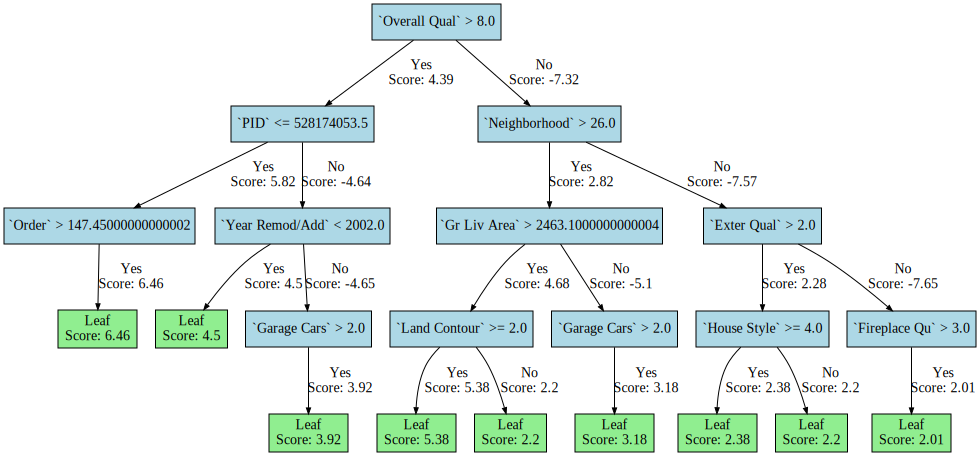

CPU times: total: 1.34 s
Wall time: 1.39 s


In [12]:
%%time
sorter = CategoricalSorter(scoring_function=woe_scoring_func)
encoder = SortedOrdinalEncoder(sorter)
bin_calculator = NBinsCalculator(strategy=FreedmanDiaconisStrategy(), max_bins=20)
discretizer = PandasQCutDiscretizer(bin_calculator=bin_calculator)
evaluator = BinaryRuleEvaluator(score_strategies=[WoEScore(), RecallScore(), PrecisionScore()])
rule_filter = BinaryRuleFilter(min_recall=0.1)
informative_cols = [col for col in X.columns if len(pd.unique(X[col])) > 1]
X_encoded = encoder.fit_transform(X[informative_cols], y)
X_sparse, rule_map = discretize_and_create_sparse_matrix(X_encoded, num_quantiles=20)
tree_root = build_decision_tree(X_sparse, y, rule_map, 0, np.sum(y), len(y) - np.sum(y), 0, max_depth=4, min_samples=5, min_pos=20, min_improvement=0.001)
plotter = DecisionTreePlotter(tree_root)
tree_graph = plotter.plot_tree()
display(tree_graph)

In [13]:
#add positives and negatives
#beautify rules
#round rules safely
#fix np.log error
#SOLIDify code
#make diagram nicer ? straight arrows
#testing
#debugging
#output queries to copy-paste
#combine with embeddings/clustering